In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_stats = pd.read_csv("raw_stats.csv")

In [3]:
# Define the selected features for the percentage model
raw_selected_features = ['G', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS' ]

#Define X and y sets
X = raw_stats[raw_selected_features]
y = raw_stats["Pos"]

# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Print the X_train dataframe
X_train.head()

,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,TRB,AST,STL,BLK,TOV,PF,PTS
14993,53.0,1750.0,281.0,657.0,82.0,243.0,199.0,414.0,127.0,151.0,180.0,101.0,32.0,5.0,83.0,108.0,771.0
3371,82.0,2800.0,327.0,615.0,0.0,0.0,327.0,615.0,165.0,229.0,727.0,69.0,34.0,93.0,146.0,181.0,819.0
2400,29.0,522.0,72.0,171.0,9.0,27.0,63.0,144.0,58.0,72.0,47.0,108.0,11.0,6.0,50.0,35.0,211.0
15957,82.0,2084.0,267.0,517.0,0.0,4.0,267.0,513.0,215.0,335.0,628.0,226.0,68.0,85.0,154.0,253.0,749.0
3029,48.0,272.0,20.0,84.0,1.0,6.0,19.0,78.0,13.0,17.0,28.0,64.0,17.0,2.0,26.0,49.0,54.0


In [4]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [5]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.999/0.521
k: 3, Train/Test Score: 0.748/0.536
k: 5, Train/Test Score: 0.704/0.558
k: 7, Train/Test Score: 0.679/0.565
k: 9, Train/Test Score: 0.663/0.572
k: 11, Train/Test Score: 0.653/0.567
k: 13, Train/Test Score: 0.649/0.574
k: 15, Train/Test Score: 0.647/0.574
k: 17, Train/Test Score: 0.639/0.577
k: 19, Train/Test Score: 0.639/0.578


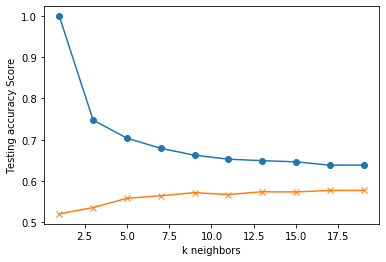

In [8]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.574
